# Module 6. Labs regression analysis

## Exercise 1: Relation between heart weight and body weight in Cats

### Part 1

Perform a linear regression analysis on the variables body weight (`Bwt`, dependent variable) and heart weight (`Hwt`, independent variabele).


1. Import the dataset `Cats.csv`.


In [2]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
from sklearn.linear_model import LinearRegression


cats = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Cats.csv', delimiter=',')

In [3]:
#cats = pd.read_csv('/content/drive/MyDrive/DS/data/Cats.csv')
# Show the first few records of the Data Frame
cats.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


2. Draw a scatter plot of both variables.


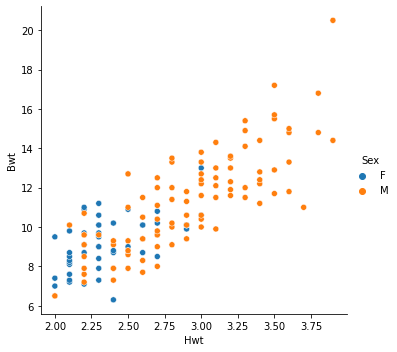

In [4]:
# Scatterplot maken om te zien of je een lineair regressiemodel nodig hebt
# cats is de dataset, je splitst de Hwt/Bwt op basis van geslacht
sns.relplot(data=cats, x='Hwt', y='Bwt', hue='Sex')

3. Calculate and draw the regression line.


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

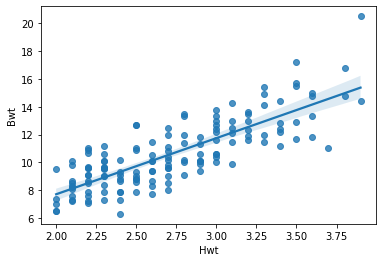

In [5]:
# zonder kleurencombo
sns.regplot(data=cats,x=cats.Hwt, y=cats.Bwt)

-0.35 met als coëfficient 4.03


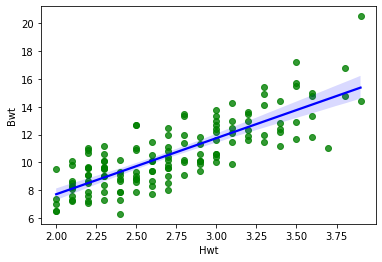

In [6]:
# kleuren meegeven --> {'color' : 'eerste letter van kleur'}
sns.regplot(data=cats, x=cats.Hwt, y=cats.Bwt, line_kws={'color':'b'}, scatter_kws={'color':'g'})

from sklearn.linear_model import LinearRegression

# x-coefficient berekenen
cats_x = cats.Hwt.values.reshape(-1,1)

# y-coefficient berekenen
cats_y = cats.Bwt

# Object aanmaken voor Lineaire regressie
# .fit() gaat het model 'trainen', hier moet je enkel de X- en Y-coördinaat meegeven.
weight_model = LinearRegression().fit(cats_x, cats_y)

# Regressie-lijn uitprinten: snijpunt en X-coefficient nodig
snijpunt = weight_model.intercept_
Xcoeff = weight_model.coef_[0]

print(f'{snijpunt:.2f} met als coëfficient {Xcoeff:.2f}')

4. Calculate the correlation coefficient and the coefficient of determination.

In [7]:
# correlatie coëfficient berekenen --> NumPy gebruiken
corr = np.corrcoef(cats.Hwt, cats.Bwt)[0][1]

print(f'R = {corr:.2f}')

print(f'R² = {corr**2:.2f}')



R = 0.80
R² = 0.65


De R-waarde duidt aan op een sterke lineaire relatie omdat de waarde tussen 0.75 en 0.80 ligt. De R²-waarde duidt aan dat de verhouding van hartgewicht bij elkaar aanleunt. De waarde geeft aan hoe interessant de kolommen zijn om te vergelijken.

### Part 2

1. Perform a linear regression analysis on the variables body weight (`Bwt`) and heart weight (`Hwt`), but this time **subdivided by gender** (`Sex`). Use the same dataset (`Cats.csv`).


In [9]:
male = cats[cats.Sex == 'M']
male.head()

female = cats[cats.Sex == 'F']
female.head()

,ID,Sex,Hwt,Bwt
0,1,F,2.0,7.0
1,2,F,2.0,7.4
2,3,F,2.0,9.5
3,4,F,2.1,7.2
4,5,F,2.1,7.3


Hieronder maken we een scatterplot op basis van het gender van de katten. Eerst stellen we in dat er op één rij twee grafieken gaan geplaatst worden. Dit regelen we met de `subplots` methode waarbij we eerst `het aantal horizontale rijen` geven, daarna het `aantal kolommen` en als laatst `de grootte van de figuren`. De figs en axs slaan we op, maar we gaan enkel de `axs`gaan gebruiken om de titels juist te plaatsen én ook om het veld in het grid te gaan opvullen met een plot.


Text(0.5, 1.0, 'vrouwelijke katten')

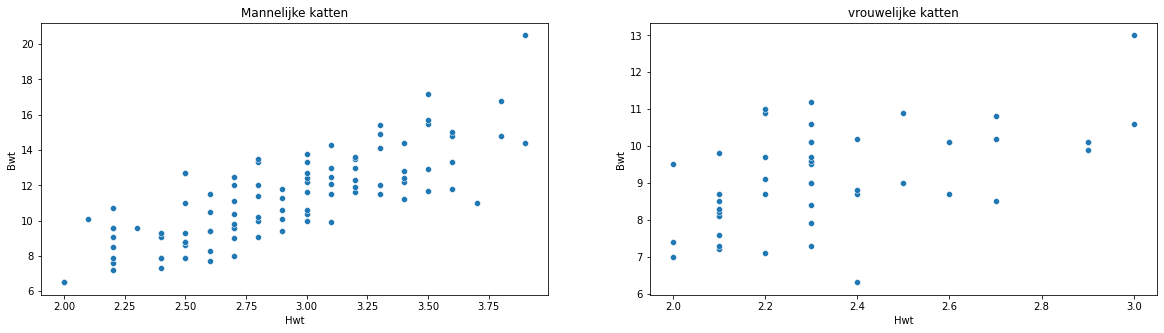

In [10]:
# instellen dat je op één rij twee grafieken gaat plaatsen, figsize geef je de lengte en hoogte mee van de figuur
# subplots geeft twee waarden terug, fig en axs sla je op
# axs ga je gebruiken om de titels in te stellen

fig, axs = plt.subplots(1, 2, figsize=(20,5))

sns.scatterplot(ax = axs[0], data=male, x='Hwt', y='Bwt')
axs[0].set_title('Mannelijke katten')

sns.scatterplot(ax = axs[1], data=female, x='Hwt', y='Bwt')
axs[1].set_title('vrouwelijke katten')

3. Calculate and draw the regression line.


<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

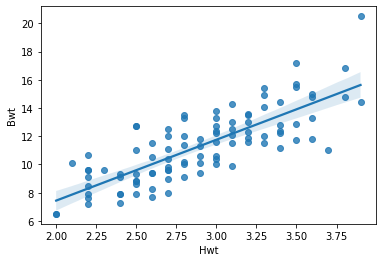

In [11]:
sns.regplot(data=male, x=male.Hwt, y=male.Bwt)

<AxesSubplot:xlabel='Hwt', ylabel='Bwt'>

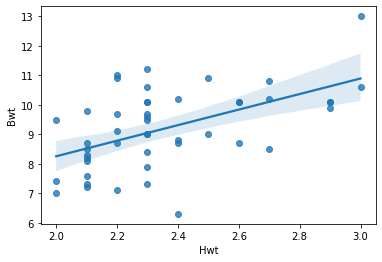

In [12]:
sns.regplot(data=female, x=female.Hwt, y=female.Bwt)

In [13]:
## Mannelijke katten:
male_x = male.Hwt.values.reshape(-1,1)
male_y = male.Bwt

weight_model_M = LinearRegression().fit(male_x, male_y)

print(f'{weight_model_M.intercept_} als snijpunt, {weight_model_M.coef_[0]} als X-coëfficient')

## Vrouwelijke katten:
female_x = female.Hwt.values.reshape(-1,1)
female_y = female.Bwt

weight_model_F = LinearRegression().fit(female_x, female_y)

print(f'{weight_model_F.intercept_} als snijpunt, {weight_model_F.coef_[0]} als X-coëfficient')

-1.1768252533094827 als snijpunt, 4.309818875119161 als X-coëfficient
2.981312384473198 als snijpunt, 2.6364140480591494 als X-coëfficient


4. Calculate the correlation coefficient and the coefficient of determination.


In [14]:
# Coëfficient berekenen:
cor_M = np.corrcoef(male.Hwt, male.Bwt)[0][1]

# R-waarde uitprinten
print(f'R bij mannelijke katten = {cor_M:.3f}')

# R²-waarde uitprinten
print(f'R² bij mannelijke katten = {cor_M**2:.3f}')

# Coëfficient berekenen:
cor_F = np.corrcoef(female.Hwt, female.Bwt)[0][1]

# R-waarde uitprinten
print(f'R bij vrouwelijke katten = {cor_F:.3f}')

# R²-waarde uitprinten
print(f'R² bij vrouwelijke katten = {cor_F**2:.3f}')

R bij mannelijke katten = 0.793
R² bij mannelijke katten = 0.629
R bij vrouwelijke katten = 0.532
R² bij vrouwelijke katten = 0.283


De R-waarde van de mannelijke katten leunt tegen 0.80 aan. Dit toont aan dat er een sterk lineair verband is tussen de twee kolommen. Bij de vrouwelijke katten ligt dit een stuk lager en pas op 0.53. Deze dataset scoort dus minder goed vergeleken met die van de mannelijke katten.

### Answers

| Selection |  $\beta_0$ | $\beta_1$ |       $R$ |     $R^2$ |
| :-------- | ---------: | --------: | --------: | --------: |
| All       | -0.3510784 | 4.0317575 | 0.8041348 | 0.6466328 |
| Male      | -1.1768253 | 4.3098189 | 0.7930443 | 0.6289193 |
| Female    |  2.9813124 |  2.636414 | 0.5320497 | 0.2830768 |


## Exercise 2: Vlaamse land en tuinbouwbedrijven

1. Use the dataset Landbouw Vlaanderen. The file contains data about farms in Vlaanderen

Source: Departement Landbouw en Visserij op basis StatBel

In [16]:
landbouw = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Landbouw%20Vlaanderen.csv', delimiter = ";")
# Show the first few records of the Data Frame
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha)
0,1980,75706,"8,38"
1,1981,73292,"8,58"
2,1982,71255,"8,79"
3,1983,69807,"8,94"
4,1984,68083,"9,15"


2. What are the datatypes for each of the columns.

In [17]:
landbouw.dtypes

jaar                                        int64
aantal land en tuinbouwbedrijven            int64
gemiddelde oppervlakte per bedrijf (ha)    object
dtype: object

3. Change the datatype of 'gemiddelde oppervlakte per bedrijf (ha)' to float.

In [18]:
# object-type moet veranderen naar iets wat rekenbaar is
# komma vervangen door een punt --> str.replace(',','.')
# moet kommagetal zijn dus astype(float)

# if is optioneel
if(landbouw['gemiddelde oppervlakte per bedrijf (ha)'].dtype != 'float64'):
    landbouw['gemiddelde oppervlakte per bedrijf (ha)'] = landbouw['gemiddelde oppervlakte per bedrijf (ha)'].str.replace(",",".").astype('float')
    landbouw.head()

4. Draw a scatter plot of the number of farms versus the year.


<AxesSubplot:xlabel='jaar', ylabel='aantal land en tuinbouwbedrijven'>

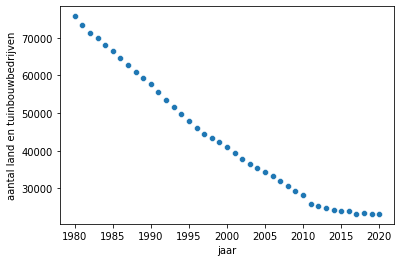

In [19]:
sns.scatterplot(data=landbouw, y='aantal land en tuinbouwbedrijven', x='jaar')

5. Is there a positive / negative relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R = -0.9861066349492859

In [20]:
cor = np.corrcoef(landbouw['jaar'], landbouw['aantal land en tuinbouwbedrijven'])[0][1]

print(f'R = {cor}')

R = -0.9861066349492859


6. Is there a strong relationship between jaar and 'aantal land en tuinbouwbedrijven'?

R² = 0.9724062954910041

In [21]:
print(f'R² = {cor**2}')

R² = 0.9724062954910041


7. Draw a scatter plot of the 'gemiddelde oppervlakte per bedrijf (ha)' versus the year.

<AxesSubplot:xlabel='jaar', ylabel='gemiddelde oppervlakte per bedrijf (ha)'>

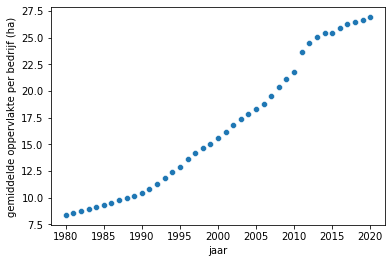

In [22]:
sns.scatterplot(data=landbouw, x='jaar', y='gemiddelde oppervlakte per bedrijf (ha)')

8. What will be the 'gemiddelde oppervlakte per bedrijf (ha)' in 2035?

Gemiddelde oppervlakte in 2035 = 34.91987804878045

In [23]:
x = landbouw['jaar'].values.reshape(-1,1)
y = landbouw['gemiddelde oppervlakte per bedrijf (ha)']
landbouw_weight_model = LinearRegression().fit(x, y)

print(f'Het verwachte gemiddeld aantal oppervlakte is {landbouw_weight_model.intercept_ + (landbouw_weight_model.coef_[0] * 2035)}')

Het verwachte gemiddeld aantal oppervlakte is 34.91987804878045


8. Calculate the total agricultural area for each year.   
Calculate for each year the change of the total area relative to 1980.  
Make a plot.

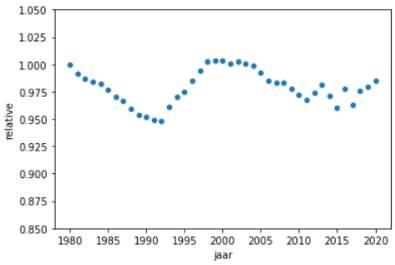


In [24]:
landbouw['tot_oppervlakte'] = landbouw['aantal land en tuinbouwbedrijven'] * landbouw['gemiddelde oppervlakte per bedrijf (ha)']
landbouw.head()

,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha),tot_oppervlakte
0,1980,75706,8.38,634416.28
1,1981,73292,8.58,628845.36
2,1982,71255,8.79,626331.45
3,1983,69807,8.94,624074.58
4,1984,68083,9.15,622959.45


In [25]:
tot_opp_1980 = landbouw.iloc[0,3]
print(tot_opp_1980)

landbouw['relatief_opp_tov_1980'] = landbouw['tot_oppervlakte'] / tot_opp_1980

landbouw.head()

634416.28


,jaar,aantal land en tuinbouwbedrijven,gemiddelde oppervlakte per bedrijf (ha),tot_oppervlakte,relatief_opp_tov_1980
0,1980,75706,8.38,634416.28,1.000000
1,1981,73292,8.58,628845.36,0.991219
2,1982,71255,8.79,626331.45,0.987256
3,1983,69807,8.94,624074.58,0.983699
4,1984,68083,9.15,622959.45,0.981941


## Exercise 3: Movies of 2006 and 2007

1. The file Movies_2006_2007 contains information on over 200
movies that were released during 2006 and 2007.

In [26]:
movies = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/Movies_2006_2007.csv', delimiter = ";", encoding='cp1252')
# Show the first few records of the Data Frame
movies.head()

,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,$22 707 121,$32 109 139,$39 517 763,$11 000 000,$15 909 367,$16 000 000
1,2.0,Year of the Dog,Paramount Vantage,Drama,$141 803,$318 598,$1 540 141,NaN,NaN,NaN
2,3.0,War,Lionsgate,Action,$12 839 402,NaN,$22 466 994,$18 200 000,$27 040 983,$25 000 000
3,4.0,Stomp the Yard,Sony Pictures,Drama,$28 263 594,$42 853 277,$61 356 221,$15 000 000,$33 166 898,$14 000 000
4,5.0,The Illusionist,Freestyle Releasing,Drama,NaN,NaN,$39 868 642,$44 407 533,$38 189 217,$16 500 000


2. Use cols_with_dollars to transform the amounts in dollars into floats.
For ease of use, change the values into 'million dollar' - values.  
E.g. $22 707 121	becomes 22.707121.  


In [27]:
cols_with_dollars = ['7-day Gross',	'14-day Gross',	'Total US Gross',	'International Gross',	'US DVD Sales',	'Budget']

In [28]:
# kolommen worden meegegeven
# de namen kunnen we via een for-lus gaan aanvullen
# zo hoeven we niet drie keer dezelfde lijn te schrijven met een andere kolom
# twee keer een .str.replace(..,...)
for col in cols_with_dollars:
    movies[col] = movies[col].str.replace('$','').str.replace(' ','').astype(float)

movies.dropna(inplace=True)

movies.head(10)

C:\Users\dylan\AppData\Local\Temp\ipykernel_20348\1482377612.py:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  movies[col] = movies[col].str.replace('$','').str.replace(' ','').astype(float)


,Index,Movie,Distributor,Genre,7-day Gross,14-day Gross,Total US Gross,International Gross,US DVD Sales,Budget
0,1.0,The Texas Chainsaw Massacre: The Beginning,New Line,Horror,22707121.0,32109139.0,39517763.0,11000000.0,15909367.0,16000000.0
3,4.0,Stomp the Yard,Sony Pictures,Drama,28263594.0,42853277.0,61356221.0,15000000.0,33166898.0,14000000.0
5,6.0,Pirates of the Caribbean: At World's End,Buena Vista,Adventure,173339068.0,232297818.0,309420425.0,651576067.0,295701718.0,300000000.0
8,9.0,Ghost Rider,Sony Pictures,Action,58960097.0,83257376.0,115802596.0,121900000.0,103699106.0,120000000.0
9,10.0,Saw III,Lionsgate,Horror,44576835.0,63279443.0,80238724.0,83638091.0,47124617.0,10000000.0
12,13.0,Ocean's Thirteen,Warner Bros.,Adventure,50705336.0,79668309.0,117144465.0,194600000.0,47716836.0,85000000.0
14,15.0,Shrek the Third,Paramount Pictures,Adventure,150338458.0,227906792.0,322719944.0,476238218.0,174342569.0,160000000.0
15,16.0,The Holiday,Sony Pictures,Romantic Comedy,17110339.0,30092962.0,63280000.0,141910324.0,71202459.0,85000000.0
20,21.0,Ratatouille,Buena Vista,Comedy,80517305.0,124984886.0,206445654.0,418000000.0,189036784.0,150000000.0
21,22.0,The Hills Have Eyes II,Fox Searchlight,Horror,11883609.0,17579582.0,20804166.0,16662372.0,30466195.0,15000000.0


3. Create two scatterplots: one of Total US Gross (Y) versus
7-day Gross (X) and one of Total US Gross (Y)
versus 14-day Gross (X).

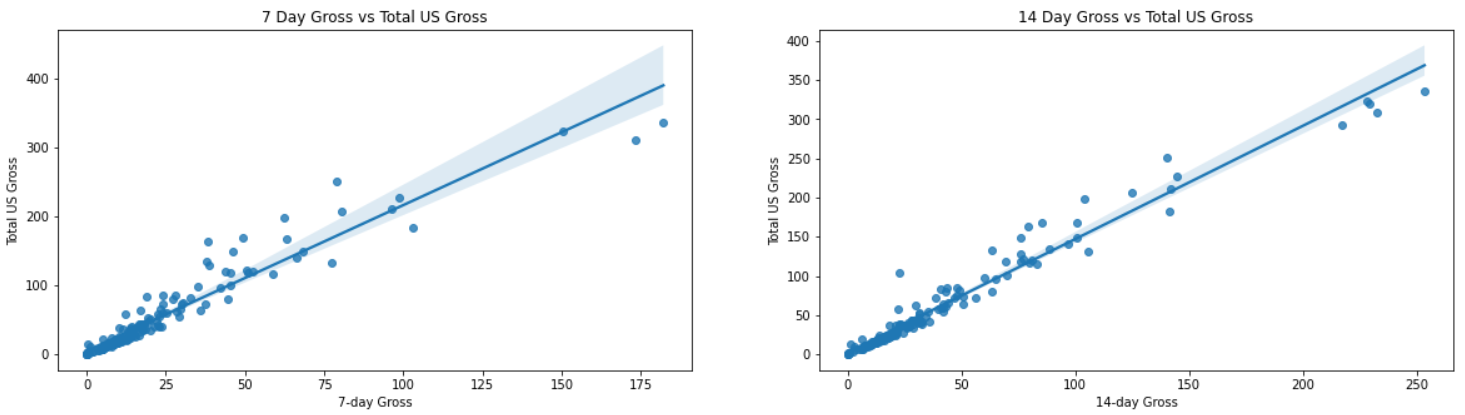

Text(0.5, 1.0, '14 Day gross vs year vs total US Gross')

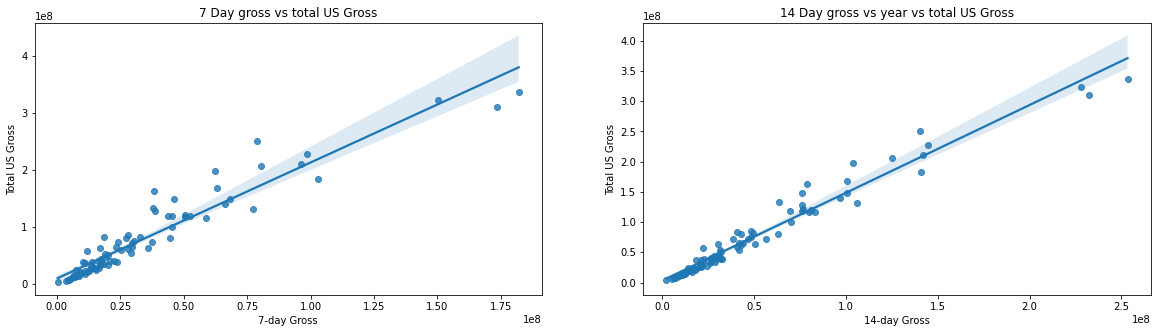

In [29]:
fig, axs = plt.subplots(1,2,figsize=(20,5))

sns.regplot(x='7-day Gross', y='Total US Gross', data=movies, ax=axs[0])
axs[0].set_title('7 Day gross vs total US Gross')

sns.regplot(x='14-day Gross', y='Total US Gross', data=movies, ax=axs[1])
axs[1].set_title('14 Day gross vs year vs total US Gross')


4. What are the corresponding
values for $R$ and $R^2$?

R (7 Day Gross vs Total US Gross) = 0.959407544414305  
R² (7 Day Gross vs Total US Gross) = 0.9204628362790865  
R (14 Day Gross vs Total US Gross) = 0.9813238689021966  
R² (14) Day Gross vs Total US Gross) = 0.9629965356771755

In [30]:
cor = np.corrcoef(movies['7-day Gross'], movies['Total US Gross'])[0,1]
print(f'{cor:.2%}')

95.46%


In [31]:
print(f'{cor**2:.2%}')

91.13%


In [32]:
cor = np.corrcoef(movies['14-day Gross'], movies['Total US Gross'])[0,1]
print(f'{cor:.2%}')

98.07%


In [33]:
print(f'{cor**2:.2%}')

96.18%


5. What are the equations of the linear regression lines in the previous part?  
What exactly does intercept and slope tell you about the movie business?

7 days gross: ŷ = 4.590921233818129 + 2.113464756610182 * x  
14 days gross: ŷ = 2.44900289255105 + 1.4464530702590803 * x

In [34]:
from sklearn.linear_model import LinearRegression

movies_x = movies['7-day Gross'].values.reshape(-1,1)
movies_y = movies['Total US Gross']

weight_model = LinearRegression().fit(movies_x, movies_y)
print(f'Regressielijn: ^y {weight_model.intercept_:.2f} + {weight_model.coef_[0]}')

Regressielijn: ^y 9380048.64 + 2.0342252525084468


In [35]:
from sklearn.linear_model import LinearRegression

movies_x = movies['14-day Gross'].values.reshape(-1,1)
movies_y = movies['Total US Gross']

weight_model = LinearRegression().fit(movies_x, movies_y)
print(f'Regressielijn: ^y {weight_model.intercept_:.2f} + {weight_model.coef_[0]}')

Regressielijn: ^y 3162434.30 + 1.4516205865625091


6. In the previous scatterplots you can see some ouliers at the right side. These are movies that did great
during their first week or two. 
* 6.1 Make a boxplot to visualize the outliers for the first week or two.

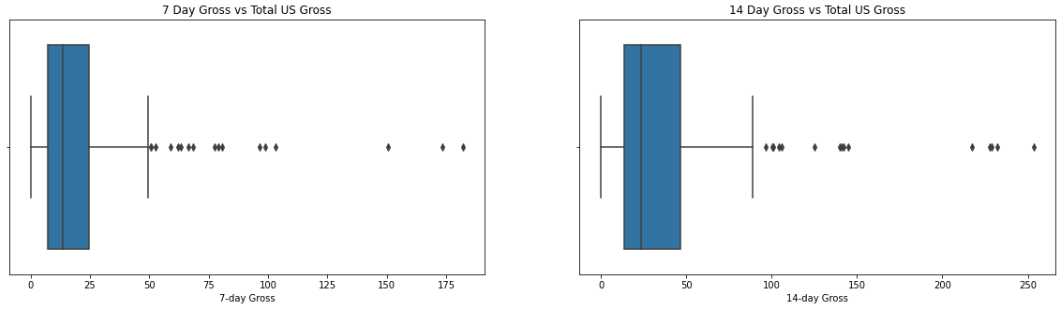

Text(0.5, 1.0, '14-day Gross vs Total US Gross')

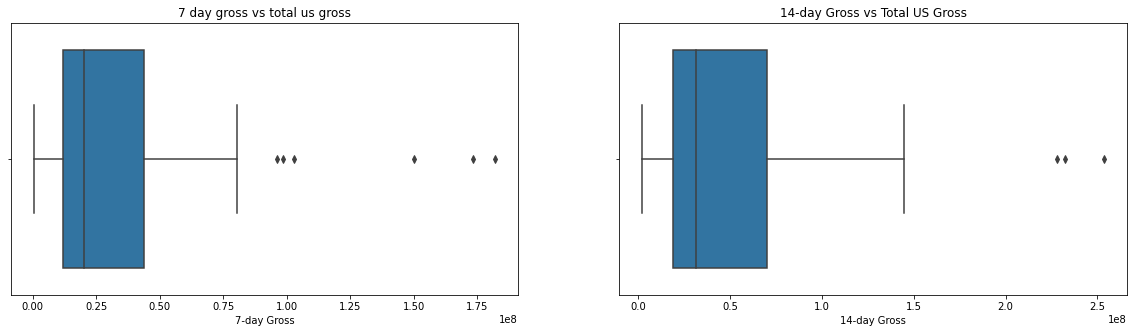

In [36]:
fig, axs = plt.subplots(1,2, figsize=(20,5))

sns.boxplot(x='7-day Gross', data=movies, ax=axs[0])
axs[0].set_title('7 day gross vs total us gross')

sns.boxplot(x='14-day Gross', data=movies, ax=axs[1])
axs[1].set_title('14-day Gross vs Total US Gross')

* 6.2 Calculate the upper limit values for the first week or two.

limit_7_days_gross is 50.376637875  
limit_14_days_gross is 96.2906745

In [37]:
limit_7 = (movies["7-day Gross"] > 0.8 * 10**8)
limit_14 = (movies["14-day Gross"] > 1.5 * 10**8)

* 6.4 Remove the outliers out of the dataset.

Text(0.5, 1.0, '14 day gross vs total us gross')

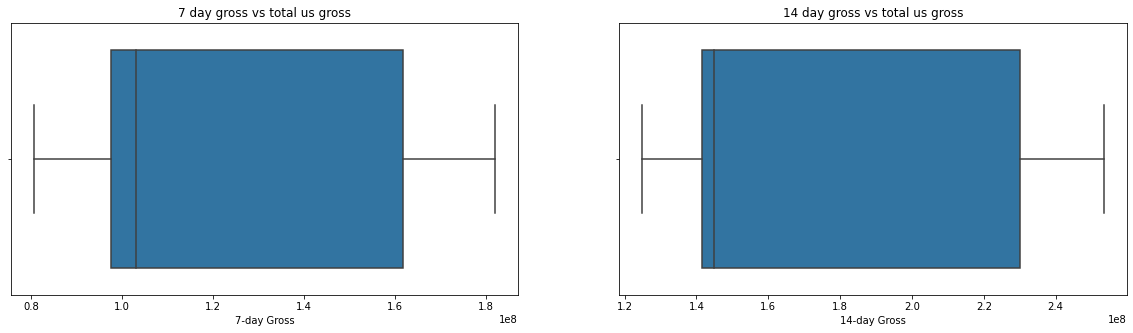

In [38]:
# dataframe overschrijven en alle outliers eruit halen
movies = movies[(limit_7 | limit_14)]

# plaats maken voor twee plots
fig, axs = plt.subplots(1,2, figsize=(20,5))
sns.boxplot(x='7-day Gross', data=movies, ax=axs[0])
axs[0].set_title('7 day gross vs total us gross')
sns.boxplot(x='14-day Gross', data=movies, ax=axs[1])
axs[1].set_title('14 day gross vs total us gross')

* 6.5 Give the new values for $R$ and $R^2$.


R (7 Day Gross vs Total US Gross)= 0.9324792650689281  
R² (7 Day Gross vs Total US Gross) = 0.8695175797834882

R (14 Day Gross vs Total US Gross)= 0.9584258717658031  
R² (14) Day Gross vs Total US Gross) = 0.9185801516700396

In [39]:
cor = np.corrcoef(movies['7-day Gross'], movies['Total US Gross'])[0,1]
print(f'{cor:.2%}')
print(f'{cor**2:.2%}')

cor = np.corrcoef(movies['14-day Gross'], movies['Total US Gross'])[0,1]
print(f'{cor:.2%}')
print(f'{cor**2:.2%}')

93.28%
87.01%
97.26%
94.60%


* 6.6 Give the new values for the slope and the intercept of the regression lines. Do the outliers have a great effect?


7 days gross: ŷ = -5.073945979380596 + 2.7456809688135646 * x  
14 days gross: ŷ = -3.227354951096885 + 1.6529869503645318 * x

In [40]:
movies_x = movies['7-day Gross'].values.reshape(-1,1)
movies_y = movies["Total US Gross"]

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = 74342387.43 + 1.44 x


In [41]:
movies_x = movies['14-day Gross'].values.reshape(-1,1)
movies_y = movies["Total US Gross"]

weight_model = LinearRegression().fit(movies_x, movies_y)

print(f"Regression line: ŷ = {weight_model.intercept_:.2f} + {weight_model.coef_[0]:.2f} x")

Regression line: ŷ = 49555646.06 + 1.14 x
